In [2]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt

In [3]:
import matplotlib.pyplot as plt

In [4]:
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


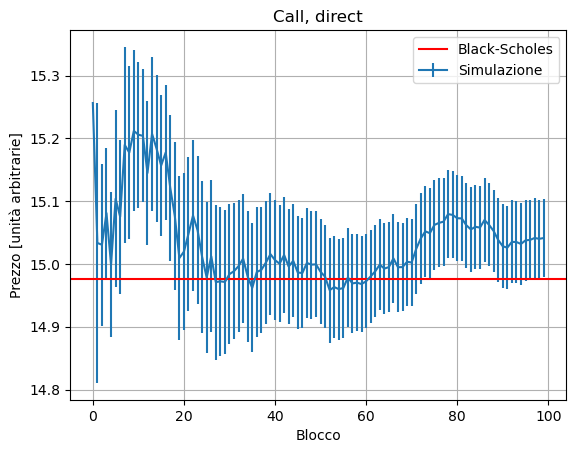

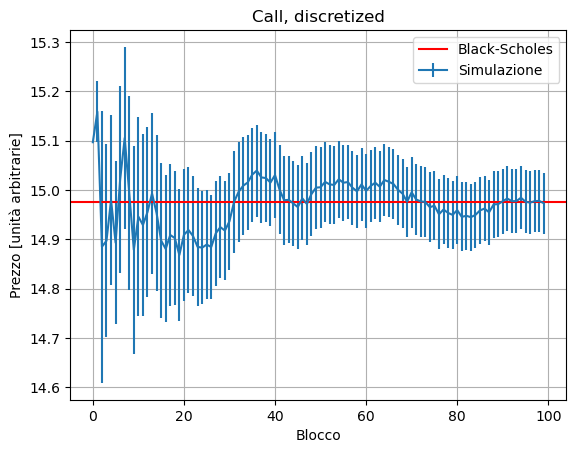

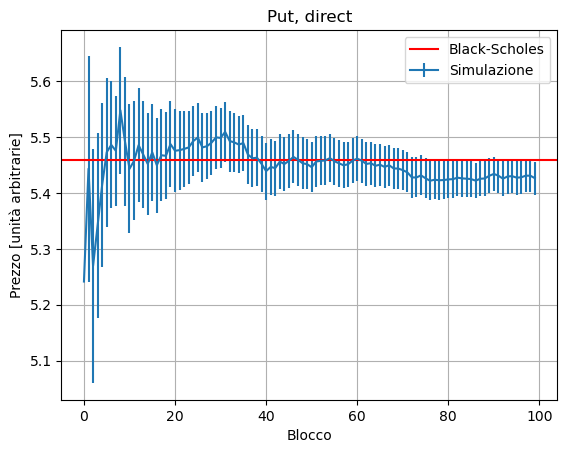

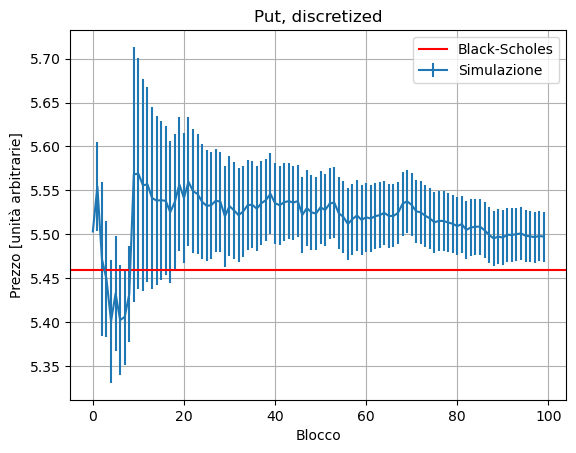

In [10]:
for type, type_str in zip([call, put], ["Call", "Put"]):
    for title in ["direct", "discretized"]:
        means = np.loadtxt("lsn3.1_" + type_str + "_" + title + ".dat", usecols=0)
        errors = np.loadtxt("lsn3.1_" + type_str + "_" + title + ".dat", usecols=1)
        xs = np.arange(len(means))        
        plt.errorbar(xs, means, yerr=errors, label="Simulazione")
        plt.axhline(y=type, color="red", label="Black-Scholes")
        plt.grid(True)
        plt.title(type_str + ", " + title)
        plt.xlabel("Blocco")
        plt.ylabel("Prezzo [unità arbitrarie]")
        plt.legend()
        plt.show()